In [46]:
using LinearAlgebra
using DataFrames, CSV
using Plots
using LaTeXStrings

## Loading data from CSV files

In [47]:
outData = CSV.read("./DataFiles/dubinsOutCirc.csv",DataFrame)
inData = CSV.read("./DataFiles/dubinsInCirc.csv",DataFrame)

,x_final,y_final,x,y,theta,input
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.57,-0.866,0.0,0.0,0.0,0.999769
2,-0.57,-0.866,0.0262782,0.000345289,0.026278,0.999876
3,-0.57,-0.866,0.0525382,0.00138093,0.0525571,0.999853
4,-0.57,-0.866,0.0787619,0.00310622,0.0788355,0.999821
5,-0.57,-0.866,0.104931,0.00551993,0.105113,0.999772
6,-0.57,-0.866,0.131028,0.00862037,0.131389,0.999692
7,-0.57,-0.866,0.157035,0.0124053,0.157661,0.999531
8,-0.57,-0.866,0.182933,0.0168721,0.183925,0.999051
9,-0.57,-0.866,0.208728,0.0219047,0.20143,0.332992


## Function for change of reference

In [48]:
function shift_rotate(x, y, x_shift, y_shift, θ_shift)
    v = [x - x_shift, y-y_shift]
    R = [cos(θ_shift) sin(θ_shift); -sin(θ_shift) cos(θ_shift)]
    vf = R*v
    return vf[1], vf[2]
end

shift_rotate (generic function with 1 method)

## Preprocessing outside data

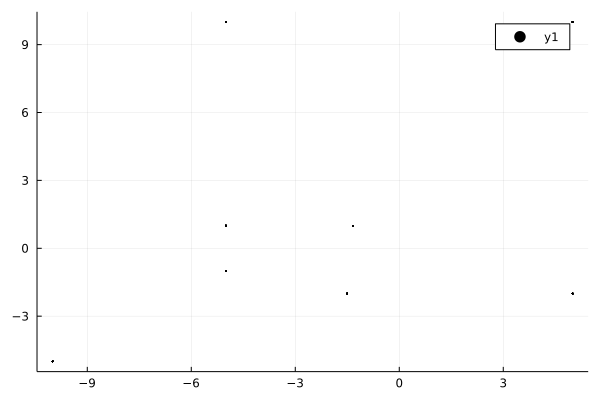

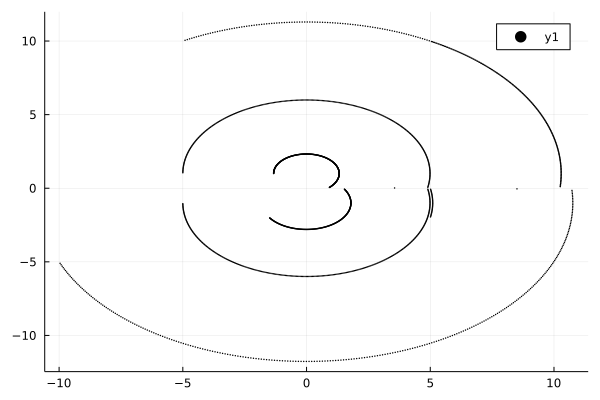

,x_final,y_final,input
,Float64,Float64,Int64
1,-1.3301,0.996851,1
2,-1.33006,1.0101,1
3,-1.3299,1.02335,1
4,-1.3296,1.0366,1
5,-1.32916,1.04984,1
6,-1.3286,1.06308,1
7,-1.3279,1.07631,1
8,-1.32707,1.08954,1
9,-1.32611,1.10276,1


In [49]:
outData.input = round.(outData.input)

display(scatter(outData.x_final, outData.y_final, markersize = 1, color = :black, msc=:black, markershape = :circle))

tempX = zeros(length(outData.x_final))
tempY = zeros(length(outData.y_final))

for i=1:length(outData.x_final)
    (tempX[i], tempY[i]) = shift_rotate(outData.x_final[i], outData.y_final[i],
                                        outData.x[i], outData.y[i], outData.theta[i])
end

outData.x_final .= tempX
outData.y_final .= tempY

outData.x .= 0
outData.y .= 0
outData.theta .= 0


# Remove most of the data on x-axis to make the dataset balanced
cond1 = (outData.y_final .<= -0.05) .| (outData.y_final .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(outData.y_final))) .% 2000 .== 0  # Keep this data which is index less than 2000
cond3 = (outData.input .!= 0) # Keep the data only if input is nonzero
dataOut = outData[(cond1 .| cond2) .& cond3,:]
display(scatter(dataOut.x_final, dataOut.y_final, markersize = 1, 
        color = :black, msc=:black, markershape = :circle))
dataOut[!,:input] .= Int64.(round.(dataOut.input))
select!(dataOut, [:x_final, :y_final, :input])
dataOut = dataOut[(dataOut.input .!= 0),:]

## Preprocessing inside data

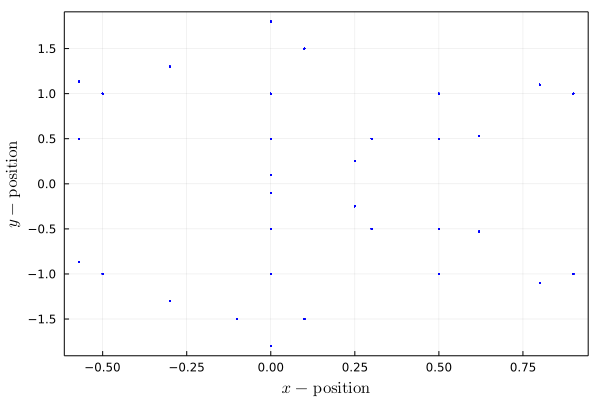

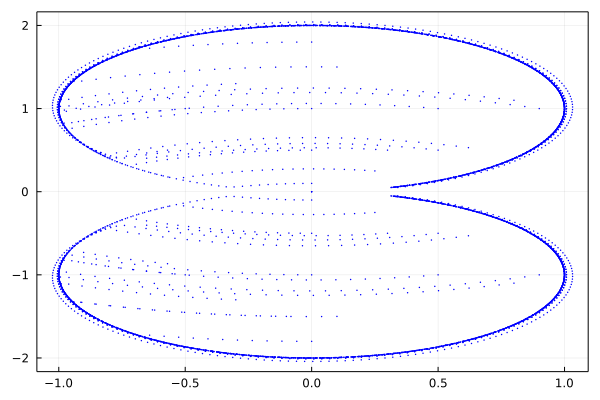

In [50]:
inData.input = round.(inData.input)

fig1 = scatter(inData.x_final, inData.y_final, markersize = 1,
                color = :blue, msc=:blue, markershape = :circle,
				framestyle = :box, legend = nothing)
xlabel!(fig1, L"$x-\textrm{position}$")
ylabel!(fig1, L"$y-\textrm{position}$")
display(fig1)

tempX = zeros(length(inData.x_final))
tempY = zeros(length(inData.y_final))

for i=1:length(inData.x_final)
    (tempX[i], tempY[i]) = shift_rotate(inData.x_final[i], inData.y_final[i],
                                        inData.x[i], inData.y[i], inData.theta[i])
end

inData.x_final .= tempX
inData.y_final .= tempY



inData.x .= 0
inData.y .= 0
# Remove most of the data on x-axis to make the dataset balanced
cond1 = (inData.y_final .<= -0.05) .| (inData.y_final .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(inData.y_final))) .% 2000 .== 0  # Keep this data which is index less than 2000
cond3 = (inData.input .!= 0) # Keep the data only if input is nonzero
dataIn = inData[(cond1 .| cond2) .& cond3,:]
dataIn[!,:input] .= Int64.(round.(dataIn.input))
select!(dataIn, [:x_final, :y_final, :input])
dataIn = dataIn[(dataIn.input .!= 0),:]
fig2 = scatter(dataIn.x_final, dataIn.y_final, markersize = 1,
                color = :blue, msc=:blue, markershape = :circle,
				 framestyle = :box, label = nothing)



In [51]:
using ScikitLearn
using ScikitLearn.CrossValidation: train_test_split
@sk_import tree: DecisionTreeClassifier
@sk_import preprocessing: StandardScaler
@sk_import ensemble: RandomForestClassifier

PyObject <class 'sklearn.ensemble._forest.RandomForestClassifier'>

## Training RF classifier for outside data

In [52]:
X = [dataOut.x_final dataOut.y_final]
y = dataOut.input
scatter(dataOut.x_final, dataOut.y_final, markersize = 1, color = :black, msc=:black, markershape = :circle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

outClf = RandomForestClassifier(n_estimators = 100)
outClf.fit(X_train, y_train)

y_pred = outClf.predict(X_test)

# metrics are used to find accuracy or error
@sk_import metrics: accuracy_score  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9975369458128078

## Training RF classifier for inside data

In [53]:
X = [dataIn.x_final dataIn.y_final]
y = dataIn.input
scatter(dataIn.x_final, dataIn.y_final, markersize = 1, color = :black, msc=:black, markershape = :circle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

inClf = RandomForestClassifier(n_estimators = 100)
inClf.fit(X_train, y_train)

y_pred = inClf.predict(X_test)

  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
using BenchmarkTools
@btime inClf.predict([0 0])

ACCURACY OF THE MODEL: 0.9908256880733946  16.628 ms (33 allocations: 1.69 KiB)


1-element Vector{Int64}:
 -1

## Simulation Dubins vehicle

In [54]:
# Simulation using the learned model
dubins_dyn(x, u) = [cos(x[3]), sin(x[3]), u]
x0 = [0, 0, 0]
xf = [0.5, 0.5]
n_iter = 1000
dt = 0.01

states = zeros(n_iter, 3)
input = zeros(n_iter)

states[1,:] .= x0
last_ind = 1
dubins_dyn(x0, 1)*dt
for i=1:n_iter-1
    x_tran = shift_rotate(xf[1], xf[2], states[i,1], states[i,2], states[i, 3])
    u = inClf.predict([x_tran[1] x_tran[2]])
    states[i+1,:] .= states[i,:] .+ dt*dubins_dyn(states[i,:], u[1])
    last_ind = i
    if norm(xf-states[i,1:2]) < 0.1
        break
    end
end



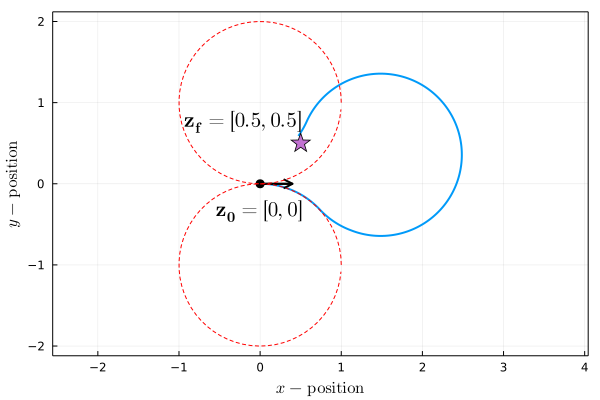

In [60]:
function plot_circle(xc, yc, rc, fig)
	th = collect(0:0.1:2π)
	plot!(fig, xc .+ rc*cos.(th), yc .+ rc*sin.(th), line =:dash, color =:red, label =nothing)
end

fig1 = plot(states[1:last_ind,1], states[1:last_ind,2], aspect_ratio = 1, frame_style = :box,
            legend = false, lw = 2)
# scatter!(fig1, [xf[1], x0[1]], [xf[2], x0[2]], ms = 7)
xlabel!(fig1, L"$x-\textrm{position}$")
ylabel!(fig1, L"$y-\textrm{position}$")
plot!(fig1, [0.0, 0.4], [0.0, 0.0], color =:black,arrow=true, arrowsize=1, lw=2, label =nothing)
scatter!(fig1, [0], [0], color =:black, markersize = 5, label =  nothing)
scatter!(fig1, [xf[1]], [xf[2]], shape = :star5, label = nothing, markersize = 10)
annotate!(fig1, -0.0, -0.3, L"$\mathbf{z_0} = [0, 0]$")
x_f = xf[1]; y_f = xf[2]
annotate!(fig1, xf[1]-0.7, xf[2]+0.3, L"$\mathbf{z_f} = [%$x_f, %$y_f]$")
plot_circle(0, 1.0, 1.0, fig1)
plot_circle(0, -1.0, 1.0, fig1)
display(fig1)